# Falling Coffee Filter

The discussion on this notebook follows the text pretty closely until the end. Refer to pages 59 (bottom) through 63.

The following data were collected, tracking a coffee filter that was released to fall under the influence of gravity. You will soon learn the data have many of the complexities of real data with errors. First off, note the first time is not zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


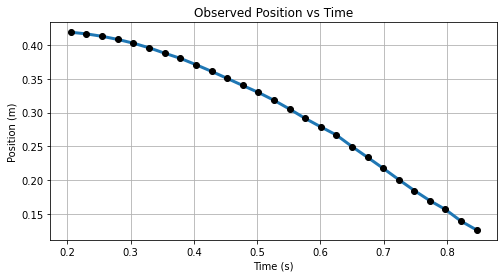

In [182]:
# Read in the data from the file. Split the data into time (t) and position (y) vectors
data = np.loadtxt('./fall_data.dat', dtype=np.float64, comments='//', skiprows=2)
t_data = data[:, 0]
y_data = data[:, 1]

# Plot the position over time
plt.subplots(figsize=(8, 4))
plt.plot(t_data, y_data, '-', lw=3)
plt.plot(t_data, y_data, 'ko')
plt.title('Observed Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.show()

## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine both first and second derivatives of position; velocity and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


In [2]:
def first_derivative(y, t):
    """ Computes the first derivative of y using central finite differencing """
    v = np.zeros(t.size-1)
    for i in range(1, t.size - 1):
        dt = t[i] - t[i-1]
        y_next = y[i + 1]
        y_prev = y[i - 1]
        v[i] = (y_next - y_prev) / (2*dt)
    return v[1:]

def second_derivative(y, t):
    """ Computes the second derivative of y using central finite differencing """
    a = np.zeros(t.size-1)
    for i in range(1, t.size - 1):
        dt = t[i] - t[i-1]
        y_next = y[i + 1]
        y_now = y[i]
        y_prev = y[i - 1]
        a[i] = (y_next - 2 * y_now + y_prev) / np.square(dt)
    return a[1:]

v_data = first_derivative(y_data, t_data)
a_data = second_derivative(y_data, t_data)

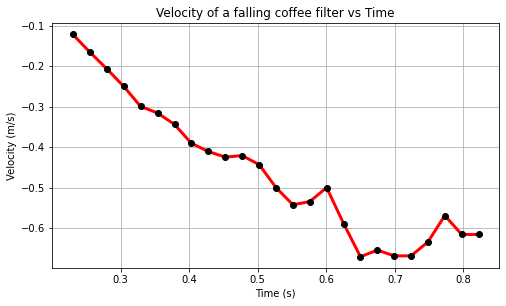

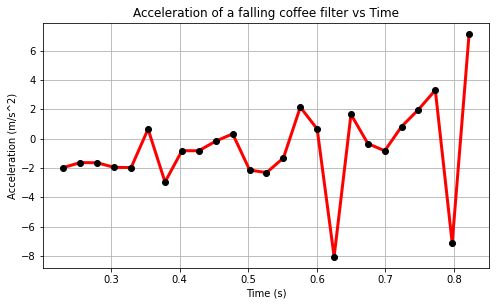

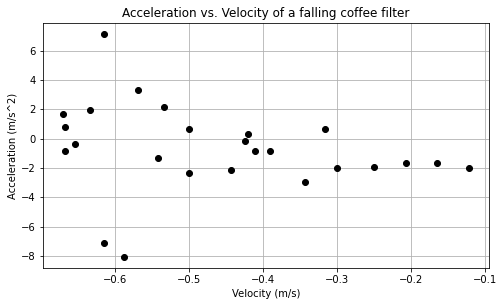

In [3]:
# Plot velocity over time
plt.subplots(figsize=(8,4.5))
plt.plot(t_data[1:-1], v_data, c='red', lw=3)
plt.plot(t_data[1:-1], v_data, 'ko')
plt.title('Velocity of a falling coffee filter vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid()
plt.show()

# Plot acceleration over time
plt.subplots(figsize=(8,4.5))
plt.plot(t_data[1:-1], a_data, c='red', lw=3)
plt.plot(t_data[1:-1], a_data, 'ko')
plt.title('Acceleration of a falling coffee filter vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.grid()
plt.show()

# Finally, plot a vs v and see if that provides addition insight into the terminal velocity
plt.subplots(figsize=(8, 4.5))
plt.plot(v_data, a_data, 'ko')
plt.title('Acceleration vs. Velocity of a falling coffee filter')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Acceleration (m/s^2)')
plt.grid()
plt.show()

## Reflections on Problem 2 ##
Based on the plot of velocity vs. time it does look like the coffee filter reaches terminal velocity at around -0.6 m/s.
However, the velocity reaches a low point of -0.67 m/s at time 0.6252 and then starts to exhibit noisy behavior.
Could this be because of lateral movements in the coffee filter as it approaches terminal velocity?

Additionally, the plot of acceleration vs. time suggests that at around the same time that velocity reaches what we
expect to be the terminal velocity based on visual inspection, the acceleration shows even more noise as it rapidly
jumps between negative and positive values.

A plot of acceleration vs. velocity provides some additional evidence of this phenomenon. All the extreme values for
acceleration occur right around a velocity of -0.6, the suspected terminal velocity.


### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or 

$$F_d = C_2v^2$$ 

depending on the speed and diameter of the objects. 

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$ 

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$ 

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.

In [85]:
# Define the functions to compute the derivatives for a linear and quadratic drag falling filter
def linear_drag_falling_filter(t, y, g, v_t):
    """
    Describes the ODEs for a falling coffee filter with linear drag
    dy/dt = v
    dv/dt = -g(1 - v/v_t)
    """
    velocity = y[1]
    acceleration = -g*(1 - (velocity / v_t))
    return np.array([velocity, acceleration])

def quadratic_drag_falling_filter(t, y, g, v_t):
    """
    Describes the ODEs for a falling coffee filter with quadratic drag
    dy/dt = v
    dv/dt = -g(1 - (v/v_t)^2)
    """
    velocity = y[1]
    acceleration = -g*(1 - np.power((velocity/ v_t), 2))
    return np.array([velocity, acceleration])

In [86]:
# Define our ODE solver with approximation methods below
def Euler(y, dt, f, t, *args):
    """ Computes the change in state via the Euler algorithm """
    return f(t, y, *args) * dt + y


def EulerCromer(y, dt, f, t, *args):
    """ Computes the change in state via the Euler-Cromer method """
    y_end = Euler(y, dt, f, t, *args)
    return f(t + dt, y_end, *args) * dt + y


def EulerRichardson(y, dt, f, t, *args):
    """ Computes the change in state via the Euler-Richardson method """
    y_mid = Euler(y, dt/2, f, t, *args)
    return f(t + dt/2, y_mid, *args) * dt + y


def solve_ode(f, tspan, y0, method=Euler, *args, **options):
    """
    Given a function f that returns derivatives,
    dy / dt = f(t, y)
    and an inital state:
    y(tspan[0]) = y0

    This function will return the set of intermediate states of y
    from t0 (tspan[0]) to tf (tspan[1])



    The function is called as follows:

    INPUTS

    f - the function handle to the function that returns derivatives of the
        vector y at time t. The function can also accept parameters that are
        passed via *args, eg f(t,y,g) could accept the acceleration due to gravity.

    tspan - a indexed data type that has [t0 tf] as its two members.
            t0 is the initial time
            tf is the final time

    y0 - The initial state of the system, must be passed as a numpy array.

    method - The method of integrating the ODEs. This week will be one of Euler,
             Euler-Cromer, or Euler-Richardson

    *args - a tuple containing as many additional parameters as you would like for
            the function handle f.

    **options - a dictionary containing all the keywords that might be used to control
                function behavior. For now, there is only one:

                first_step - the initial time step for the simulation.


    OUTPUTS

    t,y

    The returned states will be in the form of a numpy array
    t containing the times the ODEs were solved at and an array
    y with shape tsteps,N_y where tsteps is the number of steps
    and N_y is the number of equations. Observe this makes plotting simple:

    plt.plot(t,y[:,0])

    would plot positions.

    """
    # Add some error handling
    # Pull dt out of options
    dt = options['first_step']
    t0 = tspan[0]
    tf = tspan[1]
    y = [y0]
    t = [t0]
    while t[-1] < tf:
        # Compute change in t and change in position y at each time step
        y.append(method(y[-1], dt, f, t[-1], *args))
        t.append(t[-1] + dt)

    # Convert t, y to np arrays and return them
    return np.array(t), np.array(y)

In [159]:
# Set initial values of the system to pass to the ODE solver
dt = 0.025
time_span = [t_data[1], t_data[-1]]
initial_y = y_data[1]
initial_v = v_data[0]

# I'll estimate the initial velocity at time step 0 using the forward differencing method
# u_n' = (u_n+1 - u_n) / dt
# time_span = [t_data[0], t_data[-1]]
# initial_v = (y_data[1] - y_data[0]) / (t_data[1] - t_data[0])
# initial_y = y_data[0]
initial_values = np.array([initial_y, initial_v])

# Constants used for the derivatives
g = 9.8
v_t_guess = -0.625

In [160]:
# Solve the ODE with an Euler method
t_euler_linear, y_euler_linear = solve_ode(linear_drag_falling_filter, time_span, initial_values,
                                           EulerCromer, g, v_t_guess, first_step=dt)
t_euler_quad, y_euler_quad = solve_ode(quadratic_drag_falling_filter, time_span, initial_values,
                                       EulerCromer, g, v_t_guess, first_step=dt)

# Interpolate the linear and quadratic positions / velocities
f_linear_y = interpolate.interp1d(t_euler_linear, y_euler_linear[:, 0], kind='quadratic')
f_linear_v = interpolate.interp1d(t_euler_linear, y_euler_linear[:, 1], kind='quadratic')

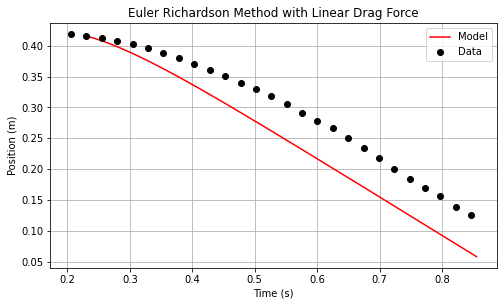

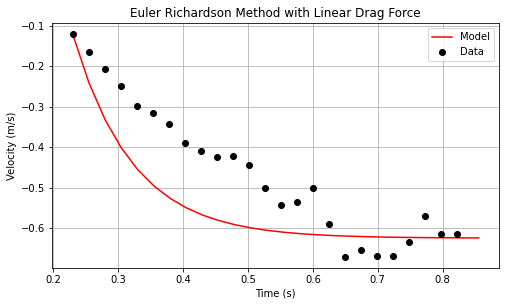

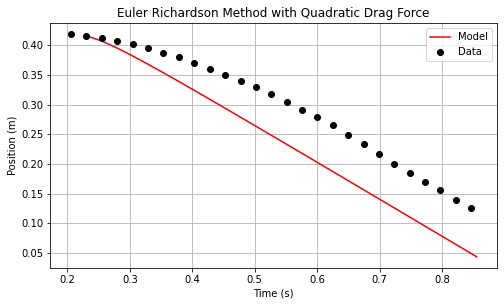

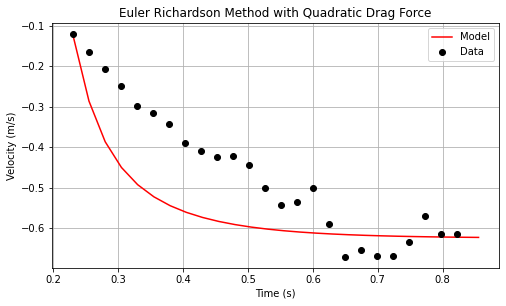

In [161]:
#########################################################
# Plot linear drag position and velocity over the data
#########################################################
plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_linear, y_euler_linear[:, 0], 'r-')
plt.plot(t_data, y_data, 'ko')
plt.title('Euler Richardson Method with Linear Drag Force')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()

plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_linear, y_euler_linear[:, 1], 'r-')
plt.plot(t_data[1:-1], v_data, 'ko')
plt.title('Euler Richardson Method with Linear Drag Force')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()

#########################################################
# Plot quadratic drag position and velocity over the data
#########################################################
plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_quad, y_euler_quad[:, 0], 'r-')
plt.plot(t_data, y_data, 'ko')
plt.title('Euler Richardson Method with Quadratic Drag Force')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()

plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_quad, y_euler_quad[:, 1], 'r-')
plt.plot(t_data[1:-1], v_data, 'ko')
plt.title('Euler Richardson Method with Quadratic Drag Force')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()


### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it. 

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.


In [172]:
# Implement a generalized drag force derivative finder. Takes in an additional alpha parameter
def generalized_drag_falling_filter(t, y, g, v_t, alpha):
    """
    Describes the ODEs for a falling coffee filter with linear drag
    dy/dt = v
    dv/dt = -g(1 - v/v_t)
    """
    velocity = y[1]
    acceleration = -g*(1 - np.power((velocity / v_t), alpha))
    return np.array([velocity, acceleration])

alpha = .275
v_t_guess = -0.65
t_euler_gen, y_euler_gen = solve_ode(generalized_drag_falling_filter, time_span, initial_values,
                                           EulerRichardson, g, v_t_guess, alpha, first_step=dt)

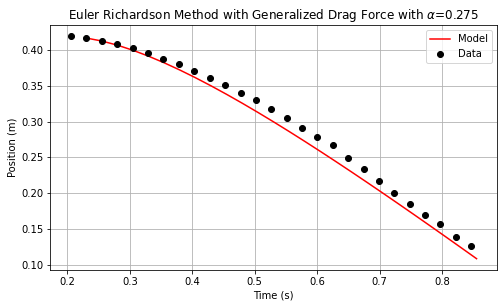

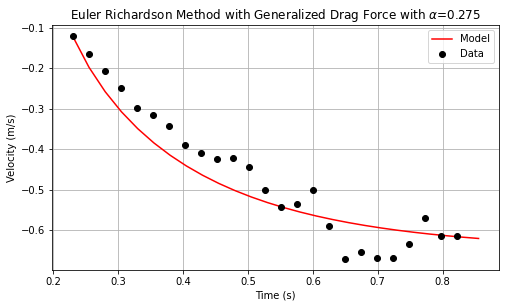

In [173]:
plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_gen, y_euler_gen[:, 0], 'r-')
plt.plot(t_data, y_data, 'ko')
plt.title(fr'Euler Richardson Method with Generalized Drag Force with $\alpha$={alpha}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()

plt.subplots(figsize=(8, 4.5))
plt.plot(t_euler_gen, y_euler_gen[:, 1], 'r-')
plt.plot(t_data[1:-1], v_data, 'ko')
plt.title(fr'Euler Richardson Method with Generalized Drag Force with $\alpha$={alpha}')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()


### Problem 5

Finally, return to your MCMC machinery and apply it to this problem. Use it to determine the optimal values of both $\alpha$ and $v_t$. Also determine the distributions for each variable. Finally, plot $\alpha$ vs. $v_t$ and see if you can witness the chain converging about the best parameters, and the exploration of the space around the optimal parameters. Plot the results of running the simulations with both the most likely as well as the average values of $v_t$ and $\alpha$. Comment on all of these plots with a specific mind to the question of how well the parameters fit the distribution, and how much uncertainty there is in the parameters.

Some helpful parameters include:
* use step sizes for 0.01 $\alpha$ and $v_t$.
* use a $\sigma^2$ in the log likelihood function value of .0001. Based on the data, say why is this value reasonable?
* create bounds on the variables based on your previous explorations. These should prevent the search from going outside a specified range. This is a form of including *priors* in the simulation.
* Do 20,000 burn in steps and 80,000 steps.
* Sample every 500 points in the chain.
* Start the process with $\alpha$ = $v_t$ = 1.0.

Some general hints include:
* The log likelihood function is $-\frac{1}{2}\sum_i \left ( y_i^o - y_i^m \right )^2/\sigma^2$ where $i$ are the individual data points (positions only), $y_i^o$ is the observed data point, and $y_i^m$ is a modeled data point.
* Make sure the modeled data points are at the same times as the observed ones. Perhaps use interpolation?
* Keep track of the acceptance rate. You should be around 23% with the parameters provided.

In [195]:
import scipy.stats

def log_likelihood_falling_filter(y_o, y_m, s):
    """ Computes the log of the likelihood function """
    return -(1 / 2) * np.sum(np.square(y_o - y_m) / s)

def do_mcmc_step(y_o, y_m, alpha_m, v_t_m, sigma, step):
    """ Performs one MCMC step """

    # First we'll generate a proposal for parameters alpha and v_t
    # TODO: Implement range of acceptable alpha and v_t
    alpha_p = alpha_m + scipy.stats.norm.rvs(scale=step)
    v_t_p = v_t_m + scipy.stats.norm.rvs(scale=step)
    while alpha_p < 0 or alpha_p > 1:
        alpha_p = alpha_m + scipy.stats.norm.rvs(scale=step)
    while v_t_p < -1.0 or v_t_p > 1:
        v_t_p = v_t_m + scipy.stats.norm.rvs(scale=step)

    # Compute model points with proposed alpha and v_t
    t_p, y_p_all = solve_ode(generalized_drag_falling_filter, time_span, initial_values,
                                           EulerRichardson, g, v_t_p, alpha_p, first_step=dt)
    y_p = y_p_all[:, 0]         # Just get the positions out of y

    # Find the log of the likelihood function
    log_alpha = np.minimum(0, log_likelihood_falling_filter(y_o, y_p, sigma) - log_likelihood_falling_filter(y_o, y_m, sigma))

    # Generate w in log(rand([0, 1])) and check if w < log(alpha)
    w = np.log(np.random.random())

    if w < log_alpha:   # Accept the proposal
        y_new = y_p
        alpha_new = alpha_p
        v_t_new = v_t_p
    else:               # Deny the proposal and keep the old m
        y_new = y_m
        alpha_new = alpha_p
        v_t_new = v_t_p

    return y_new, alpha_new, v_t_new

In [196]:
# Run a model with initial alpha and v_t
alpha_initial = 1.0
v_t_initial = 1.0
t_init, y_init = solve_ode(generalized_drag_falling_filter, time_span, initial_values,
                           EulerRichardson, g, v_t_initial, alpha_initial, first_step=dt)
pos_init = y_init[:, 0]

# MCMC parameters
mcmc_step = 0.05
mcmc_sigma = 0.0001

# Do one MCMC step to generate new parameters
y_mcmc, alpha_mcmc, vt_mcmc = do_mcmc_step(y_data[1:], pos_init, alpha_initial, v_t_initial, mcmc_sigma, mcmc_step)

# Do burn in of 20,000 steps
for i in range(10000):
    y_mcmc, alpha_mcmc, vt_mcmc = do_mcmc_step(y_data[1:], y_mcmc, alpha_mcmc, vt_mcmc, mcmc_sigma, mcmc_step)

mcmc_step = 0.01
for i in range(40000):
    y_mcmc, alpha_mcmc, vt_mcmc = do_mcmc_step(y_data[1:], y_mcmc, alpha_mcmc, vt_mcmc, mcmc_sigma, mcmc_step)

<ipython-input-172-23ccba94e1d9>:9: RuntimeWarning: invalid value encountered in power
  acceleration = -g*(1 - np.power((velocity / v_t), alpha))


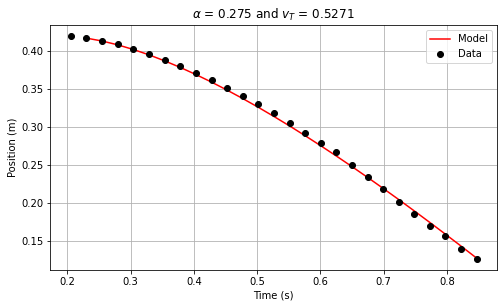

In [199]:
plt.subplots(figsize=(8, 4.5))
plt.plot(t_data[1:], y_mcmc, 'r-')
plt.plot(t_data, y_data, 'ko')
plt.title(fr'$\alpha$ = {alpha} and $v_T$ = {vt_mcmc:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(['Model', 'Data'])
plt.grid()
plt.show()